In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [27]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

### data analysis

#### Q1\ What is the most important reason for churn?

Text(0.5, 1.0, 'the most important reason for churn')

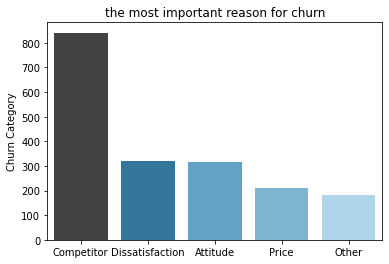

In [184]:
df_ex = df['Churn Category'].value_counts()
sns.barplot(x=df_ex.index, y=df_ex, palette=['#434343','#217bac', '#53a7d5','#71b8df','#a4d8f4' ])
plt.title('the most important reason for churn')

#### Q2\ Gender effect on churn ?

In [121]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [122]:
df_ex = df[df['Customer Status'] == 'Churned'].groupby('Gender')[['Customer Status']].count()
df_ex

,Customer Status
Gender,
Female,939
Male,930


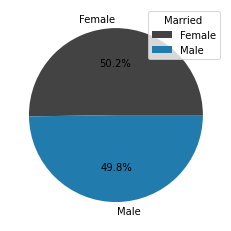

In [125]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(df_ex['Customer Status'], labels=df_ex.index, colors=['#434343','#217bac'], autopct='%1.1f%%')
plt.legend(title='Married')
plt.show() 

#### Q3\ the top 10 cities Total revenue

In [197]:
df_ex = df.groupby('City')[['Total Revenue']].sum().sort_values(by='Total Revenue', ascending=False)[:10]
df_ex

,Total Revenue
City,
Los Angeles,852725.23
San Diego,738416.01
Sacramento,353371.84
San Jose,326478.36
San Francisco,306995.99
Fresno,194430.25
Long Beach,185937.12
Escondido,155899.80
Oakland,154564.36


Text(0.5, 1.0, 'the top 10 cities Total revenue')

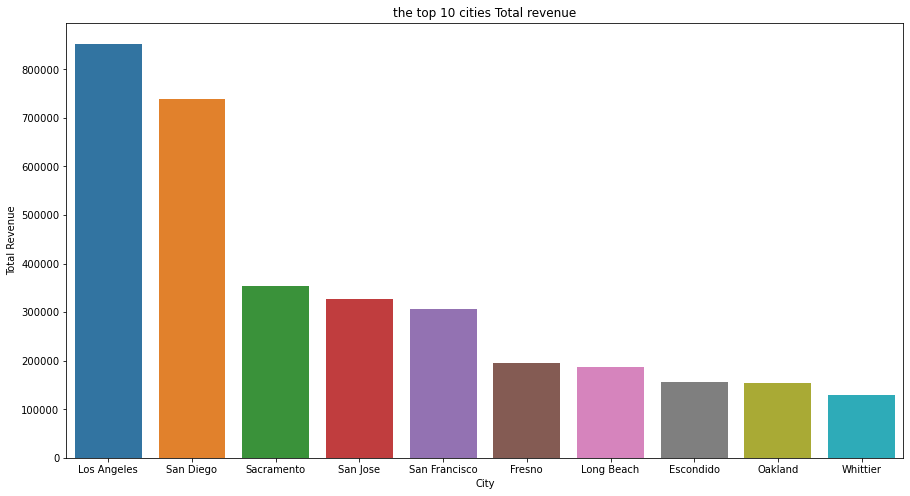

In [200]:
fig = plt.figure(figsize=[15,8])
sns.barplot(x=df_ex.index, y = df_ex['Total Revenue'])
plt.title('the top 10 cities Total revenue')

#### Q3\ what is the most city churn

In [126]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [203]:
df[['Online Security']]

,Online Security
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,No
7040,No
7041,Yes


In [173]:
df_ex1 = df.groupby('City')[['Customer Status']].count().sort_values(by='Customer Status', ascending=False)[:10]
df_ex1

,Customer Status
City,
Los Angeles,293
San Diego,285
San Jose,112
Sacramento,108
San Francisco,104
Fresno,61
Long Beach,60
Oakland,52
Escondido,51


In [186]:
df_ex = df[df['City'].isin(df_ex1.index)]
df_ex

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
31,0048-PIHNL,Female,48,Yes,0,Los Angeles,90058,34.001617,-118.222274,5,...,Bank Withdrawal,20.45,900.90,0.0,0,2429.42,3330.32,Stayed,NaN,NaN
32,0052-DCKON,Male,28,Yes,0,Los Angeles,90063,34.044271,-118.185237,9,...,Bank Withdrawal,-2.00,7942.15,0.0,0,2888.82,10830.97,Stayed,NaN,NaN
36,0058-EVZWM,Female,37,Yes,0,Stockton,95209,38.044523,-121.348048,2,...,Bank Withdrawal,89.80,4959.60,0.0,0,279.40,5239.00,Stayed,NaN,NaN
37,0060-FUALY,Female,60,Yes,0,Los Angeles,90003,33.964131,-118.272783,4,...,Bank Withdrawal,94.75,5597.65,0.0,0,967.01,6564.66,Stayed,NaN,NaN
40,0067-DKWBL,Male,69,No,0,San Diego,92129,32.961064,-117.134917,0,...,Bank Withdrawal,49.25,91.10,0.0,0,87.98,179.08,Churned,Competitor,Competitor made better offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,9888-ZCUMM,Male,48,Yes,1,Los Angeles,90018,34.028735,-118.317236,3,...,Bank Withdrawal,60.05,3845.45,0.0,0,0.00,3845.45,Stayed,NaN,NaN
7014,9950-MTGYX,Male,30,Yes,2,San Jose,95139,37.218705,-121.762429,8,...,Credit Card,20.30,487.95,0.0,0,537.04,1024.99,Stayed,NaN,NaN
7019,9959-WOFKT,Male,61,No,0,Los Angeles,90019,34.049841,-118.338460,0,...,Bank Withdrawal,106.70,7382.25,0.0,0,1041.57,8423.82,Stayed,NaN,NaN
7030,9972-VAFJJ,Female,77,Yes,0,San Diego,92116,32.765299,-117.122565,1,...,Bank Withdrawal,94.00,4871.45,0.0,0,2524.92,7396.37,Stayed,NaN,NaN


array([699, 418,  53], dtype=int64)

<AxesSubplot:xlabel='City', ylabel='Count'>

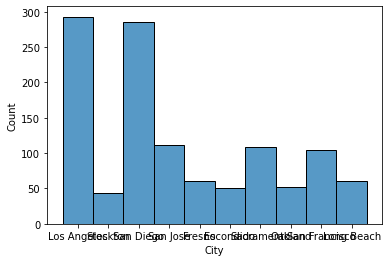

In [189]:
sns.histplot(df_ex['City'])